In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
### df_scale = StandardScaler().fit_transform(df)

#### Деревья решений, Решающие деревья (DecisionTrees)

ЗАДАЧИ: Регрессия,  Классификация,  Сегментация

+ Просты, легко интерпретируемые

- Не высокая степень предсказаний

ПОВЫСИТЬ ТОЧНОСТЬ ПРЕДСКАЗАНИЙ !!!

##### Бэггинг, Случайный лес, Бустинг

Комитетные методы

Каждый из этих подходов включает построение большого количества деревьев решений, что приводит к существенному улучшению точности предсказаний.


##### Деревья решений 
Дерево решений само по себе — это в основном жадное, нисходящее, рекурсивное разбиение. «Жадное», потому что на каждом шагу выбирается лучшее разбиение. «Сверху вниз» — потому что мы начинаем с корневого узла, который содержит все записи, а затем делается разбиение.

In [3]:
#  from sklearn.tree import DecisionTreeClassifier
#  DecisionTreeClassifier
#  plot_tree

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

criterion{“gini”, “entropy”}, default=”gini”

splitter{“best”, “random”}, default=”best”

max_depth=None             # глубина дерева

random_state=None          # нужен для генерации различных деревьев

In [10]:
# ввод данных
df = pd.read_excel('D:/!!!!!МСА21/ДЕРЕВЬЯ/color.xls')
print(df.shape)
df

(20, 3)


,Номер,Класс,Цвет
0,0,0,желтый
1,1,1,синий
2,2,1,синий
3,3,1,синий
4,4,1,синий
5,5,0,желтый
6,6,0,желтый
7,7,0,желтый
8,8,0,желтый
9,9,1,синий


In [6]:
X = df.drop(['Класс', 'Цвет'], axis=1)
y = df['Класс']

In [7]:
model=tree.DecisionTreeClassifier(criterion="entropy",splitter='best')
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [8]:
model.score(X,y)           # Переобучение, так как на полном наборе

1.0

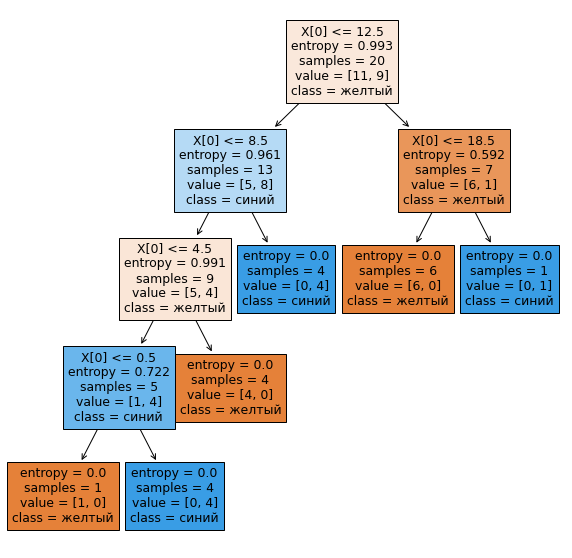

In [9]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(model,                         
                   class_names=df['Цвет'],
                   filled=True)

In [128]:
import math
# "entropy" - информационная энтропия Шеннона для узла
round(-9/20*math.log(9/20,2)-11/20*math.log(11/20,2),3)

# Наилучшая точка расщепления - наибольший информационный выигрыш Gain ratio

0.993

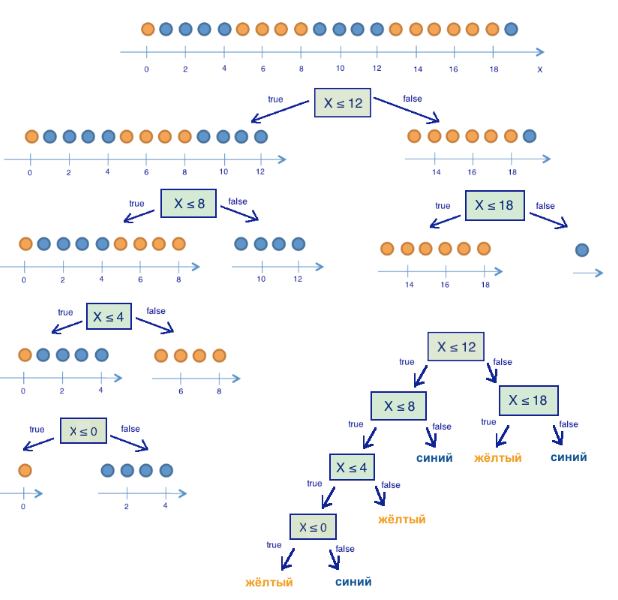

In [129]:
# Построение модели
model1=tree.DecisionTreeClassifier(criterion="gini",splitter='best')
model1.fit(X,y)        # обучение
model1.score(X,y)      # точность модели

1.0

In [130]:
# "gini" - мера Джини, мера неоднородности для дерева классификации
# Критерий разбиения - уменьшение Джини после разбиения

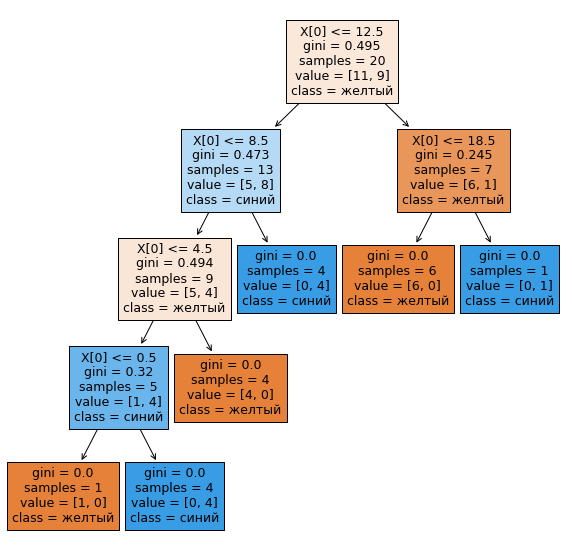

In [131]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(model1,                         
                   class_names=df['Цвет'],
                   filled=True)

In [11]:
# Джини узла до разбиения (мера неоднородности, равна 0 для узла (n,0))
1- (11./20.)*(11./20.) - (9./20.)*(9./20.) 
# максимальное уменьшение Джини
0.495 - 11/20*0.437 - 9/20*0               

0.25465

In [133]:
# Тренировочная и тестовая выборка
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [134]:
model_1=tree.DecisionTreeClassifier(criterion="gini",splitter='best')
model_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [135]:
model_1.score(X,y)

0.95

In [136]:
tree_pred

array([[1., 0.],
       [0., 1.]])

In [137]:
X_test

,Номер
14,14
5,5


In [138]:
y_test

14    0
5     0
Name: Класс, dtype: int64

In [ ]:
##  2 переменные

In [139]:
# ввод данных
dfc = pd.read_excel('D:/!!!!!МСА21/ДЕРЕВЬЯ/credit.xls')
print(dfc.shape)
dfc.head()

(11, 3)


,Возраст,Зарплата,Невозврат кредита
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1


In [140]:
age_sal_tree = tree.DecisionTreeClassifier(random_state=17)
XX = dfc[['Возраст', 'Зарплата']]
yy = dfc['Невозврат кредита']
age_sal_tree.fit(dfc[['Возраст', 'Зарплата']], dfc['Невозврат кредита']);

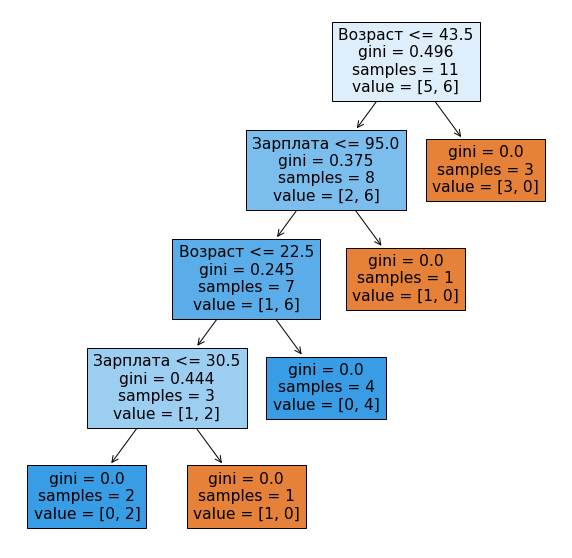

In [141]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(age_sal_tree,feature_names=['Возраст', 'Зарплата'],                         
                   filled=True)

In [52]:
age_sal_tree.score(XX,yy)

1.0

In [58]:
age_sal_tree.predict(XX)


array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [60]:
age_sal_tree.predict([[65,80]])  # прогноз

array([0], dtype=int64)

In [61]:
age_sal_tree.predict([[17,24]])   # прогноз

array([1], dtype=int64)

<font color='green'>
##### Задание 1.
    
##### Охарактеризуйте "плохих" и "хороших" заемщиков.
</font>